In [1]:
from __future__ import division
from IPython.core.display import HTML, display
from scipy.io import wavfile
import scipy

import sys
if sys.version_info < (3,):
    from StringIO import StringIO as BytesIO
else:
    from io import BytesIO
import base64

import numpy as np

from os import listdir
from os.path import isfile, join
import os
import scipy.signal as signal

import matplotlib.pyplot as plt
from csv import reader
import csv

import glob

import h5py
%matplotlib inline

import sys
sys.path.insert(0, './HELPER_PROGRAMS/tfcochleagram')

import tensorflow as tf
import tfcochleagram

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """

    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>

    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

def load_audio_wav(audio_path, DUR = 10, resample_SR = 16000, START = 0):
    # audio_path should be a .wav file (including the extension)
    # resamples the audio to the desired rate
    # Cuts audio to be only a particular duration
    # Starts at START in case you want laterin the file. 
    SR, audio = scipy.io.wavfile.read(audio_path)
    audio = audio[START:START + SR*DUR]
    if SR != resample_SR:
        audio = signal.resample(audio, resample_SR*DUR) # in actuality this might introduce artifacts, probably want to resample and then cut out the section we want. 
        SR = resample_SR    
    audio = audio[START:START + SR*DUR]
    return audio, resample_SR

def Make_mono(audio):
    audio = audio.astype(np.float32)
    if(isinstance(audio[0], np.ndarray)):  
        mono = audio.sum(axis=1) / 2.0
        mono = mono/np.amax(mono)
        return mono
        #for lists
        #mono = [None]*SR
        #for i in range(SR):
        #    mono[i] = (audio[i][0]+audio[i][1])/2
        #return mono
    else:
        audio = audio.astype(np.float32)
        audio = audio/np.amax(audio)
        return audio
    
def genDictionary(path):
    f = open(path)
    dic = {}
    f.readline()
    f.readline()
    f.readline()
    
    for line in reader(f,quotechar='"', delimiter=',',
                     quoting=csv.QUOTE_ALL, skipinitialspace=True):
        base = line[0]
        dic[base] = line
    
    return dic


def genLabelDictionary(path):
    f = open(path)
    dic = {}
    f.readline()    
    for line in reader(f):
        base = line[1]
        dic[base] = line[0]
        dic[line[0]] = line[2]
    
    return dic   

In [6]:
def main(Path ="/mindhive/mcdermott/u/jfeather/audioset/AS23Links_downloads",outputfile = "AS23Links",csv = "AS23Links.csv"):


    '''  
    os.chdir(Path)
    onlyfiles = glob.glob("*.wav")
    wav = onlyfiles[11]
    #wav = "YT_0NKUpo_xKyQ.wav"
    print(wav)
    wavPlayer("AS23Links_downloads/"+wav)    
    #SR, test_audio = scipy.io.wavfile.read(wav)
    test_audio, SR = load_audio_wav(wav)
    
    print(test_audio)
    #print(np.amax(test_audio[:,0]))
    test_audio = test_audio.astype(np.float32)
    
    mono = Make_mono(test_audio)
    #mono = test_audi
    print(len(mono))
    print(mono)
    wavfile.write("test.wav",SR,mono)
    
    wavPlayer("AS23Links_downloads/test.wav")
   
    '''
    
    #create the files for the databases
    
    
    indeces_dict = genLabelDictionary("class_labels_indices.csv")
    dictionary = genDictionary(csv)
    wavfiles = glob.glob("{0}/*.wav".format(Path))
    np.random.shuffle(wavfiles)
    numfiles = len(wavfiles)
    
    Storage = h5py.File("{0}.hdf5".format(outputfile))
    if(not "/wav" in Storage):
        wavSet = Storage.create_dataset("wav",(numfiles,160000),dtype=np.float32)
    else:
        wavSet = Storage["/wav"]
        
    if(not "/labels" in Storage):
        labelSet = Storage.create_dataset("labels",(numfiles,526),dtype=int)
    else:
        labelSet = Storage["/labels"]
    
    #TODO "/meta
    #as a dictionary
    
    
    index = 0 #in case we need to skip one for whatever reason
    for wav in wavfiles:
        if wav.endswith(".wav"):
            filepath = wav#"{0}/{1}".format(Path,wav)
            audio, resample_SR = load_audio_wav(filepath) #SR is sampling rate
            mono = Make_mono(audio)
            print(mono)
            wavSet[index] = mono
            
            YTID = os.path.splitext(os.path.basename(wav))[0][3:]#os.path.splitext(wav)[0][3:]
            print(YTID)
            if(not YTID in dictionary):
                print("oops")
                continue
            line = dictionary[YTID]
            indeces = [0]*526
            for label in line[3].split(","):
                indeces[int(indeces_dict[label])] = 1
            
            labelSet[index] = indeces
            
            index = index + 1
    
    
    print("done")
    
    

            



if __name__ == '__main__':
    main()


[-0.0972801  -0.15222637 -0.17360768 ...,  0.05901331  0.04924842
  0.05982307]
-0SdAVK79lg
[-0.05841412  0.09250474  0.12030018 ..., -0.0984215  -0.16746423
 -0.2071227 ]
--ZhevVpy1s
[ 0.00353177 -0.01182684 -0.00274471 ...,  0.08137312  0.19402887
  0.15677382]
-0mjrMposBM
[-0.04662207 -0.04644172 -0.01411203 ...,  0.03782995  0.04233604
  0.10523888]
--aO5cdqSAg
[-0.02239956 -0.02848596 -0.02919108 ...,  0.01406581  0.09556902
  0.06737499]
--PJHxphWEs
[ 0.0227715   0.11278235  0.11379343 ..., -0.02821731 -0.03279134
 -0.00707886]
--cB2ZVjpnA
[ 0.02840893  0.03197327  0.01741833 ...,  0.00910711 -0.02066976
 -0.01554612]
-0mG4W5Hlq8
[-0.12962437  0.03383142 -0.02215371 ..., -0.39889318 -0.35788971
 -0.40549541]
--aaILOrkII
[-0.0074715   0.02919539  0.00184107 ..., -0.16817822 -0.13967536
 -0.15910481]
-28U1_qW0sU
[-0.07517831 -0.12341952 -0.09730491 ...,  0.08395115  0.04628462
  0.04212208]
-24dqQM_rDk
[-0.00867392  0.00231158 -0.0013089  ..., -0.00450014 -0.01901329
 -0.02327188]


In [ ]:
##reading in and sanity checks
def sanity(Path ="/mindhive/mcdermott/u/jfeather/audioset/AS23Links_downloads",outputfile = "AS23Links",csv = "AS23Links.csv"):

    #sanity Checks
    StorageRead = h5py.File("{0}.hdf5".format(outputfile),"r")
    index = 7
    wavSet = StorageRead["/wav"]
    labelSet = StorageRead["/labels"]
    
    audio = wavSet[index]
    labels = labelSet[index]
                
    print(audio)
    print(labels)
    
    wavfile.write("test.wav",16000,audio)
    wavPlayer("test.wav")
    indeces_dict = genLabelDictionary("class_labels_indices.csv")
    indeces = np.where(labels == 1)[0]
    for i in indeces:
        print(indeces_dict[str(i)])

sanity()

[[-0.05841412  0.09250474  0.12030018 ..., -0.0984215  -0.16746423
  -0.2071227 ]
 [ 0.00353177 -0.01182684 -0.00274471 ...,  0.08137312  0.19402887
   0.15677382]]
[[  8.11467896e+01   8.38522720e+01   7.63303299e+01 ...,   7.72678757e+01
    8.49652939e+01   8.00094299e+01]
 [  1.05697357e+02   1.07000816e+02   9.32249985e+01 ...,   9.48421783e+01
    1.08779922e+02   1.04325851e+02]
 [  1.31019394e+02   1.29173889e+02   1.06264542e+02 ...,   1.09317680e+02
    1.32156372e+02   1.29570267e+02]
 ..., 
 [  1.27593672e+00   1.94272733e+00   2.29537559e+00 ...,   9.09482121e-01
    6.00807846e-01   1.02028513e+00]
 [  6.49499178e-01   1.28910589e+00   1.51795220e+00 ...,   6.70613408e-01
    4.97578949e-01   6.22255981e-01]
 [  1.18869215e-01   4.09819722e-01   5.52681923e-01 ...,   3.44163865e-01
    2.91742146e-01   2.31305569e-01]]
171
2000
[[  9.8877697   10.4729147   10.36059761 ...,  11.6886158   11.44104099
   10.02249527]
 [ 15.18902016  14.78340721  12.97805882 ...,  18.98894119

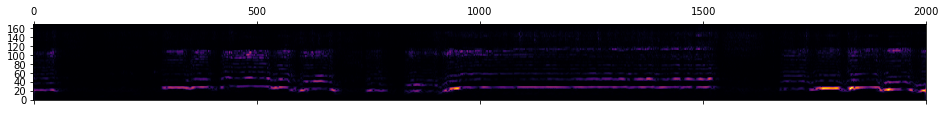

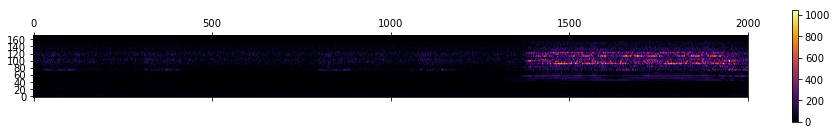

In [3]:
##make cochleagrams

def make_cochleagram(audio,SR=16000):
    with tf.Graph().as_default():
        if len(audio.shape) == 1: # we need to make sure the input node has a first dimension that corresponds to the batch size
            audio = np.expand_dims(audio,0) 
        nets = {}
        nets['input_signal'] = tf.Variable(audio, dtype=tf.float32)
        nets = tfcochleagram.cochleagram_graph(nets, audio.shape[-1], SR) # use the default values
        #LOOP HERE
        with tf.Session() as sess:
            cochleagram = nets['cochleagram'].eval(feed_dict = {nets['input_signal']:audio})

        plt.matshow(cochleagram[0,:,:,0], origin='lower', cmap='inferno')
        plt.matshow(cochleagram[1,:,:,0], origin='lower', cmap='inferno')
        plt.colorbar()
        
        print(cochleagram[0,:,:,0])
        print(len(cochleagram[0,:,:,0]))
        print(len(cochleagram[0,:,:,0][0]))
        #print(len(cochleagram[0,:,:,0][0][0]))
        print(cochleagram[1,:,:,0])
        

outputfile = "AS23Links"
StorageRead = h5py.File("{0}.hdf5".format(outputfile),"r")
index = 7
wavSet = StorageRead["/wav"]
labelSet = StorageRead["/labels"]

audio = wavSet[index]
labels = labelSet[index]
'''
print(audio)
print(labels)

wavfile.write("test.wav",16000,audio)
wavPlayer("test.wav")
indeces_dict = genLabelDictionary("class_labels_indices.csv")
indeces = np.where(labels == 1)[0]
for i in indeces:
    print(indeces_dict[str(i)])
'''
    
test_audio, SR = load_audio_wav('speech_1.wav')

batch = wavSet[1:3]
print(batch)

make_cochleagram(batch,SR)